<a href="https://colab.research.google.com/github/YanuarN/HarvestHero/blob/Rayhan/Machine%20Learning/Banana/HarvestHero_Banana_Disease_Detectionb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Model: Banana Disease Detection 🖥️🍃🦠

#### Model Input:
For training the model, we require a dataset of images that are labeled with the specific diseases visible in the photos. The dataset was sourced from kaggle datasets:

**banana leaf disease dataset v4**: [Rayhan Arlistya (2022). Banana Leaf Disease Dataset.](https://kaggle.com/datasets/f8181a55e97eb310f4d2bb2d755fb74ac4899f9a321f497ff979ee1e51b6577d)

The dataset includes the following features:
- **class_labels**: The classification label of the disease in 4 categories: Cordana, Healthy, Panama Disease, and Yellow and Black Sigatoka.
- **image with resolution**: (224, 224)

#### Model Output:
The model will output a predicted label based on its prediction of the input image.

#### The Sequence to Build the Model:
1. **Download the image dataset**
2. **Perform data preprocessing and data understanding**
3. **Use data augmentation**
4. **Build a CNN model**
5. **Perform prediction**
6. **Evaluate the model**

#### Ensuring Access to Colab GPU:
Using a GPU will significantly accelerate the process of building the model and making predictions with a large dataset. Ensure GPU is enabled in the Colab environment by going to `Runtime > Change runtime type > Hardware accelerator > GPU`.

#### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### Check NVIDIA GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f3d5a49f-eccc-de6c-baed-1263fa65c690)


#### Install Required Libraries

In [ ]:
!pip install tensorflow==2.15.0 tensorflowjs tensorflow_decision_forests
!pip install tensorflowjs==4.20

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

print(tf.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
2.15.0


#### Import Libraries and Define Version

In [ ]:
# Import Kaggle json token for downloading dataset
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Kaggle JSON/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Import Kaggle Token and Download Dataset

In [ ]:
!kaggle datasets download -d rayhanarlistya/banana-leaf-disease-dataset-v4

Dataset URL: https://www.kaggle.com/datasets/rayhanarlistya/banana-leaf-disease-dataset-v4
License(s): unknown
100% 410M/411M [00:24<00:00, 17.9MB/s]
100% 411M/411M [00:24<00:00, 17.3MB/s]


#### Unzip the dataset

In [ ]:
!unzip /content/banana-leaf-disease-dataset-v4.zip -d /content/banana_leaf_disease_dataset_v4

Archive:  /content/banana-leaf-disease-dataset-v4.zip
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/0_jpeg.rf.ee3fa0578e3243a8a22098ee95c54a67.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/101_jpeg.rf.e0b9c8c57513652cdf22358b0afaedb2.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/102_jpeg.rf.06f2283ccbb83ffd1cc2528f34ab4dc0.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/104_jpeg.rf.a910894d4d650a4edd0e31dd25054862.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/105_jpeg.rf.7399c832ebf5567788436eff72d705dc.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/106_jpeg.rf.39e2ff2f3121facde87aad83be450998.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/10_jpeg.rf.2c43729587e654f3224ac1aedcb0b58f.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/Cordana/110_jpeg.rf.8b9cbd1424f234fa55f941696272bb8d.jpg  
  inflating: /content/banana_leaf_disease_dataset_v4/

#### Resize Images

In [ ]:
from PIL import Image

def resize_images_in_directory(directory, target_size=(224, 224)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    if img.size != target_size:
                        img = img.resize(target_size, Image.ANTIALIAS)
                        img.save(file_path)

# Apply resizing
resize_images_in_directory('/content/banana_leaf_disease_dataset_v4')

<ipython-input-7-c2d7c6333a7f>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


#### Check Image Resolutions

In [ ]:
from PIL import Image
import os

def check_image_resolutions(directory):
    resolutions = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):
                img_path = os.path.join(root, file)
                with Image.open(img_path) as img:
                    resolution = img.size
                    if resolution not in resolutions:
                        resolutions[resolution] = 0
                    resolutions[resolution] += 1
    return resolutions

# Check image resolutions
resolutions = check_image_resolutions('/content/banana_leaf_disease_dataset_v4')

# Print the resolutions
print("Image resolutions and their counts:")
for resolution, count in resolutions.items():
    print(f"Resolution: {resolution}, Count: {count}")


Image resolutions and their counts:
Resolution: (224, 224), Count: 4675


#### Split Data

In [ ]:
import os
import shutil
import random

def split_data(input_dir, output_dir, train_size=0.85, val_size=0.10, test_size=0.05, seed=42):
    """
    Splits the data into training, validation, and test sets.

    Parameters:
    - input_dir: Directory containing the class subdirectories with images.
    - output_dir: Directory where the split data will be stored.
    - train_size: Proportion of the dataset to include in the train split.
    - val_size: Proportion of the dataset to include in the validation split.
    - test_size: Proportion of the dataset to include in the test split.
    - seed: Random seed for reproducibility.
    """
    assert train_size + val_size + test_size == 1.0, "Train, validation and test sizes should sum to 1."

    # Set random seed for reproducibility
    random.seed(seed)

    # Create output directories
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    # Get all class directories
    class_dirs = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(input_dir, class_dir)
        images = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

        # Shuffle the images
        random.shuffle(images)

        # Determine the split indices
        num_images = len(images)
        num_train = int(train_size * num_images)
        num_val = int(val_size * num_images)

        train_images = images[:num_train]
        val_images = images[num_train:num_train+num_val]
        test_images = images[num_train+num_val:]

        # Copy the images to the respective directories
        for split, split_images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
            split_dir = os.path.join(output_dir, split, class_dir)
            os.makedirs(split_dir, exist_ok=True)
            for image in split_images:
                src = os.path.join(class_path, image)
                dst = os.path.join(split_dir, image)
                shutil.copy(src, dst)

# Paths
input_directory = '/content/banana_leaf_disease_dataset_v4'
output_directory = '/content/split_banana_leaf_disease_dataset'

# Split data
split_data(input_directory, output_directory, train_size=0.85, val_size=0.10, test_size=0.05)

print("Data splitting completed.")


Data splitting completed.


#### Count Images in Each Directory

Number of images in each directory:

train:
  Cordana: 290
  Panama Disease: 709
  Healthy: 850
  Yellow and Black Sigatoka: 2122

val:
  Cordana: 34
  Panama Disease: 83
  Healthy: 100
  Yellow and Black Sigatoka: 249

test:
  Cordana: 18
  Panama Disease: 43
  Healthy: 51
  Yellow and Black Sigatoka: 126


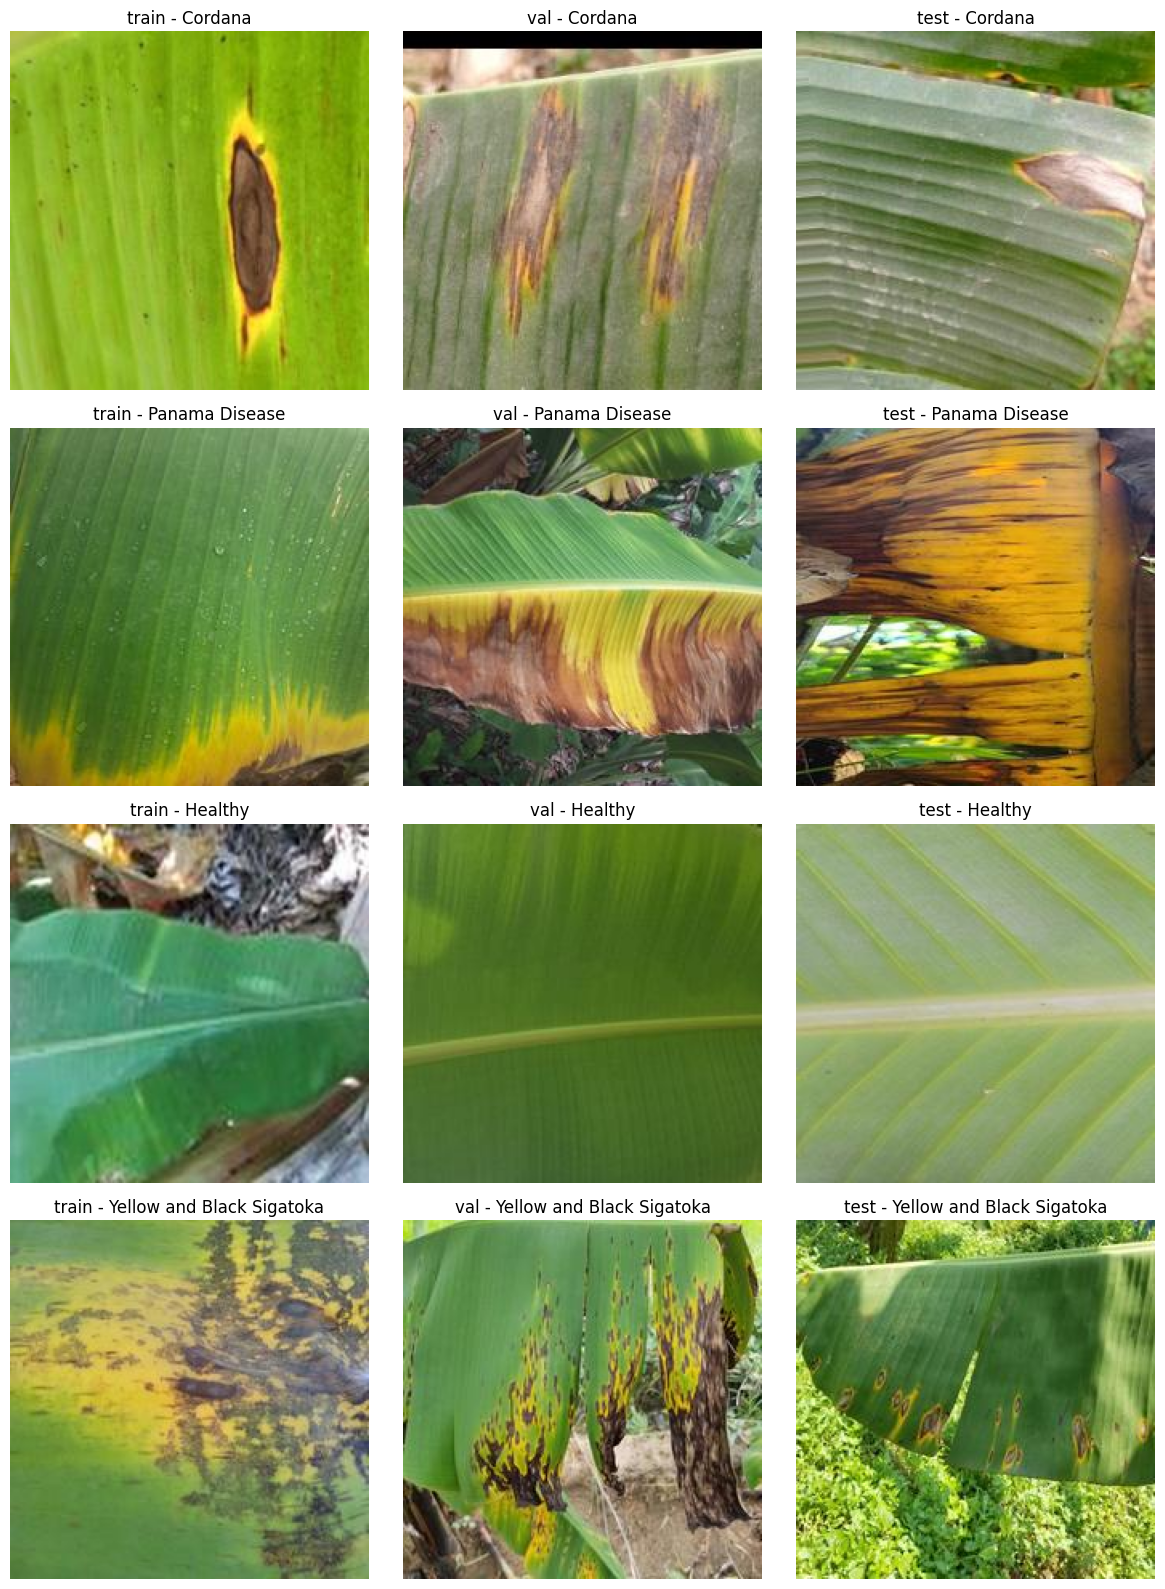

Data splitting and visualization completed.


In [ ]:
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt

def split_data(input_dir, output_dir, train_size=0.85, val_size=0.10, test_size=0.05, seed=42):
    """
    Splits the data into training, validation, and test sets.

    Parameters:
    - input_dir: Directory containing the class subdirectories with images.
    - output_dir: Directory where the split data will be stored.
    - train_size: Proportion of the dataset to include in the train split.
    - val_size: Proportion of the dataset to include in the validation split.
    - test_size: Proportion of the dataset to include in the test split.
    - seed: Random seed for reproducibility.
    """
    assert train_size + val_size + test_size == 1.0, "Train, validation and test sizes should sum to 1."

    # Set random seed for reproducibility
    random.seed(seed)

    # Create output directories
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    # Get all class directories
    class_dirs = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(input_dir, class_dir)
        images = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

        # Shuffle the images
        random.shuffle(images)

        # Determine the split indices
        num_images = len(images)
        num_train = int(train_size * num_images)
        num_val = int(val_size * num_images)

        train_images = images[:num_train]
        val_images = images[num_train:num_train+num_val]
        test_images = images[num_train+num_val:]

        # Copy the images to the respective directories
        for split, split_images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
            split_dir = os.path.join(output_dir, split, class_dir)
            os.makedirs(split_dir, exist_ok=True)
            for image in split_images:
                src = os.path.join(class_path, image)
                dst = os.path.join(split_dir, image)
                shutil.copy(src, dst)

    return class_dirs

def count_images_in_dirs(base_dir):
    counts = {}
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split)
        class_counts = {}
        for class_dir in os.listdir(split_dir):
            class_path = os.path.join(split_dir, class_dir)
            if os.path.isdir(class_path):
                class_counts[class_dir] = len(os.listdir(class_path))
        counts[split] = class_counts
    return counts

def show_sample_images(base_dir, class_dirs):
    fig, axes = plt.subplots(len(class_dirs), 3, figsize=(12, len(class_dirs) * 4))
    for i, class_dir in enumerate(class_dirs):
        for j, split in enumerate(['train', 'val', 'test']):
            split_dir = os.path.join(base_dir, split, class_dir)
            image_files = os.listdir(split_dir)
            if image_files:
                image_path = os.path.join(split_dir, image_files[0])
                img = Image.open(image_path)
                axes[i, j].imshow(img)
                axes[i, j].set_title(f"{split} - {class_dir}")
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Paths
input_directory = '/content/banana_leaf_disease_dataset_v4'
output_directory = '/content/split_banana_leaf_disease_dataset'

# Split data
class_dirs = split_data(input_directory, output_directory, train_size=0.85, val_size=0.10, test_size=0.05)

# Count images in each directory
counts = count_images_in_dirs(output_directory)

# Print the counts
print("Number of images in each directory:")
for split, class_counts in counts.items():
    print(f"\n{split}:")
    for class_dir, count in class_counts.items():
        print(f"  {class_dir}: {count}")

# Show sample images
show_sample_images(output_directory, class_dirs)

print("Data splitting and visualization completed.")


#### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


#### Paths for augmented data

In [ ]:
def augment_data(input_dir, output_dir, class_name, augment_factor=2):
    os.makedirs(output_dir, exist_ok=True)
    for file_name in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file_name)
        if file_name.endswith(('png', 'jpg', 'jpeg')):
            img = Image.open(file_path)
            img_array = np.array(img)
            img_array = np.expand_dims(img_array, 0)
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_dir, save_prefix=class_name, save_format='jpeg'):
                i += 1
                if i >= augment_factor:
                    break
max_count = max([counts['train'][class_dir] for class_dir in class_dirs])

augment_factors = {}
for class_dir in class_dirs:
    current_count = counts['train'][class_dir]
    augment_factors[class_dir] = (max_count - current_count) // current_count + 1

print("Augmentation factors:", augment_factors)


Augmentation factors: {'Cordana': 7, 'Panama Disease': 2, 'Healthy': 2, 'Yellow and Black Sigatoka': 1}


#### Augment each class in the training set

In [ ]:
augmented_output_directory = '/content/split_banana_leaf_disease_dataset/augmented'

for class_dir in class_dirs:
    input_dir = f'/content/split_banana_leaf_disease_dataset/train/{class_dir}'
    output_dir = f'{augmented_output_directory}/{class_dir}'
    augment_factor = augment_factors[class_dir]
    augment_data(input_dir, output_dir, class_dir, augment_factor=augment_factor)


#### Combine Datasets

In [ ]:
def combine_datasets(original_dir, augmented_dir):
    for class_dir in class_dirs:
        original_class_dir = os.path.join(original_dir, class_dir)
        augmented_class_dir = os.path.join(augmented_dir, class_dir)

        for file_name in os.listdir(augmented_class_dir):
            src = os.path.join(augmented_class_dir, file_name)
            dst = os.path.join(original_class_dir, file_name)
            shutil.copy(src, dst)

combine_datasets('/content/split_banana_leaf_disease_dataset/train', '/content/split_banana_leaf_disease_dataset/augmented')


#### Train and Evaluate the Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = '/content/split_banana_leaf_disease_dataset/train'
val_dir = '/content/split_banana_leaf_disease_dataset/val'
test_dir = '/content/split_banana_leaf_disease_dataset/test'

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 10580 images belonging to 4 classes.
Found 466 images belonging to 4 classes.
Found 238 images belonging to 4 classes.
{'Cordana': 0, 'Healthy': 1, 'Panama Disease': 2, 'Yellow and Black Sigatoka': 3}
{'Cordana': 0, 'Healthy': 1, 'Panama Disease': 2, 'Yellow and Black Sigatoka': 3}
{'Cordana': 0, 'Healthy': 1, 'Panama Disease': 2, 'Yellow and Black Sigatoka': 3}


#### Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Callback for our train model
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (logs.get("accuracy") > 0.90) and (logs.get("val_accuracy") > 0.86):
            print("\nMinimum accuracy reached, stop training")
            self.model.stop_training = True

callback = myCallback()

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

#### Train the model

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[callback]
)


Epoch 1/100
331/331 [==============================] - 154s 439ms/step - loss: 1.0339 - accuracy: 0.5475 - val_loss: 0.6320 - val_accuracy: 0.7446
Epoch 2/100
331/331 [==============================] - 145s 438ms/step - loss: 0.7258 - accuracy: 0.7155 - val_loss: 0.4148 - val_accuracy: 0.8412
Epoch 3/100
331/331 [==============================] - 150s 452ms/step - loss: 0.6195 - accuracy: 0.7693 - val_loss: 0.3483 - val_accuracy: 0.8627
Epoch 4/100
331/331 [==============================] - 144s 436ms/step - loss: 0.5321 - accuracy: 0.8025 - val_loss: 0.3328 - val_accuracy: 0.8755
Epoch 5/100
331/331 [==============================] - 143s 433ms/step - loss: 0.4661 - accuracy: 0.8332 - val_loss: 0.3853 - val_accuracy: 0.8498
Epoch 6/100
331/331 [==============================] - 146s 440ms/step - loss: 0.4215 - accuracy: 0.8431 - val_loss: 0.3522 - val_accuracy: 0.8820
Epoch 7/100
331/331 [==============================] - 145s 437ms/step - loss: 0.3825 - accuracy: 0.8567 - val_loss: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss}")


8/8 [==============================] - 1s 109ms/step - loss: 0.1359 - accuracy: 0.9538
Test Accuracy: 95.38%
Test Loss: 0.13593432307243347


####  Plot training and validation accuracy and loss

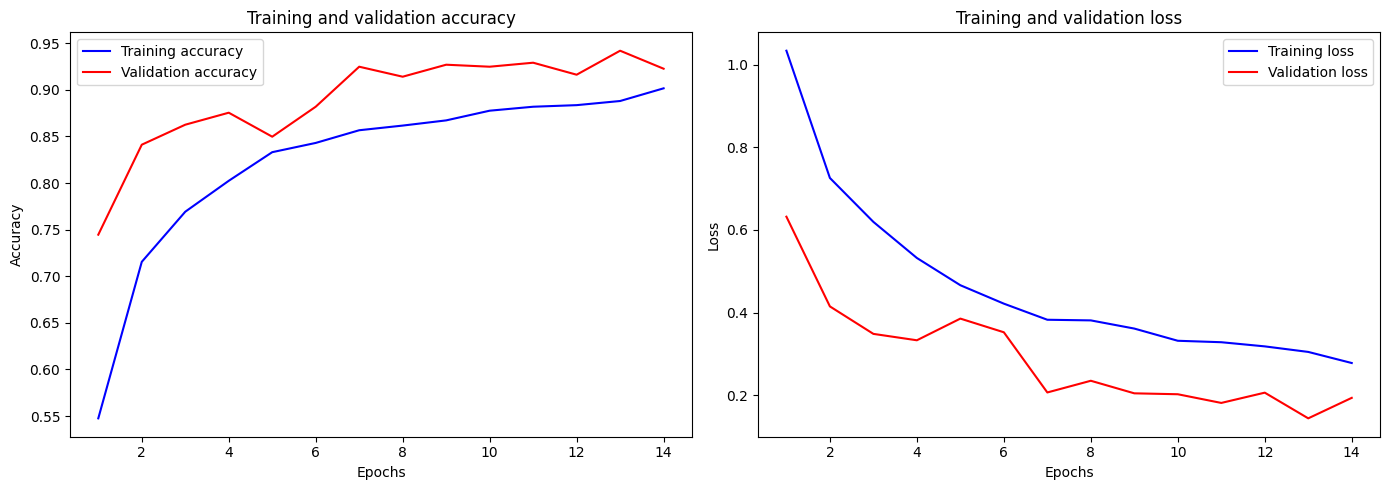

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training accuracy')  # Blue line for training accuracy
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')  # Red line for validation accuracy
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training loss')  # Blue line for training loss
plt.plot(epochs, val_loss, 'r-', label='Validation loss')  # Red line for validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### Save the Model

In [ ]:
model.save('banana_model.h5')

#### Test the Model with an Unseen Image

Saving 4_jpeg.rf.5deea06e5b221a368af9d0dc891c8323.jpg to 4_jpeg.rf.5deea06e5b221a368af9d0dc891c8323.jpg


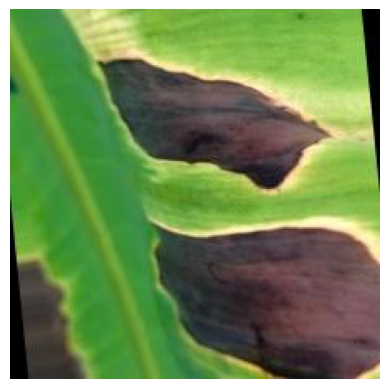

Classifying image: 4_jpeg.rf.5deea06e5b221a368af9d0dc891c8323.jpg
1/1 [==============================] - 0s 26ms/step
Prediction: Cordana
Index: 0


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Define the class labels (mapping indices to class names)
class_labels = {0: 'Cordana', 1: 'Healthy', 2: 'Panama Disease', 3: 'Yellow and Black Sigatoka'}

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224, 3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Ensure normalization matches training
    return img_array

# Function to make prediction
def classify_image(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = class_labels[class_idx]
    return class_label, class_idx

# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(224, 224, 3))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(f"Classifying image: {fn}")
    result, class_idx = classify_image(img_path)
    print(f"Prediction: {result}")
    print(f"Index: {class_idx}")


### Convert Model to TFDS

In [ ]:
import tensorflowjs as tfjs
import tensorflow as tf

#### Define paths for the Keras model and the target directory for TensorFlow.js model

In [ ]:
keras_model_path = '/content/banana_model.h5'

In [ ]:
tfjs_target_dir = 'tfjs_model'

#### Convert the Keras model to TensorFlow.js format and save it to the target directory

In [ ]:
tfjs.converters.save_keras_model(tf.keras.models.load_model(keras_model_path), tfjs_target_dir)

#### Zip the TensorFlow.js Model Directory

In [ ]:
import shutil
shutil.make_archive(tfjs_target_dir, 'zip', tfjs_target_dir)

'/content/tfjs_model.zip'

#### Download the Zipped TensorFlow.js Model

In [ ]:
from google.colab import files
files.download(f'{tfjs_target_dir}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Download the Model

In [ ]:
from google.colab import files
files.download('/content/banana_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>